##PASO 1: SUBIR EL DATASET A GOOGLE COLAB


In [ ]:
## INSTALACIÓN DE DEPENDENCIAS
!pip install pandas numpy matplotlib seaborn plotly wordcloud scikit-learn --quiet

# CARGA DEL PRIMER DATASET
#uploaded = files.upload()
#df = pd.read_csv(io.BytesIO(uploaded['complete_course_data (6).csv']))

In [ ]:
## IMPORTE DE LIBRERIAS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Summer-Olympic-medals-1976-to-2008.csv to Summer-Olympic-medals-1976-to-2008 (3).csv


## PASO 2: VERIFICAR LA EXISTENCIA DEL ARCHIVO SUBIDO

In [ ]:
df = pd.read_csv("Summer-Olympic-medals-1976-to-2008.csv", encoding="ISO-8859-1")
print("\nDimensiones del dataset:", df.shape)
## VISTA DE DATOS
print("Primeras filas:")
df.head()


Dimensiones del dataset: (15433, 11)
Primeras filas:


,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [ ]:
print("\nInformación general:")
df.info()
print("\nEstadísticas descriptivas:")
df.describe(include='all')


Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB

Estadísticas descriptivas:


,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
count,15316,15316.000000,15316,15316,15316,15316,15316,15316,15316,15316,15316
unique,9,NaN,28,41,293,11337,2,128,127,3,3
top,Beijing,NaN,Aquatics,Athletics,hockey,"PHELPS, Michael",Men,USA,United States,M,Bronze
freq,2042,NaN,2210,1523,817,16,9388,1992,1992,8817,5258
mean,NaN,1993.620789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,10.159851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1976.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1984.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1996.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2004.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd

# Estadísticas descriptivas de la columna Year
desc_year = df["Year"].describe().to_frame(name="Year")

# Renombrar el índice con etiquetas personalizadas
desc_year.index = [
    "Cantidad de registros",
    "Media",
    "Desviación estándar",
    "Mínimo",
    "Q1 (25%)",
    "Mediana (50%)",
    "Q3 (75%)",
    "Máximo"
]

# Convertir a enteros (sin decimales)
desc_year = desc_year.astype(int)

print("\nEstadísticas descriptivas de 'Year':")
display(desc_year)


Estadísticas descriptivas de 'Year':


,Year
Cantidad de registros,15316
Media,1993
Desviación estándar,10
Mínimo,1976
Q1 (25%),1984
Mediana (50%),1996
Q3 (75%),2004
Máximo,2008


In [ ]:
# Renombrar índice a español
desc = desc.rename(index={
    "count": "Cantidad de registros",
    "unique": "Valores únicos",
    "top": "Valor más frecuente",
    "freq": "Frecuencia del valor más común"
})

# Ahora sí puedes seleccionarlas
filas = ["Cantidad de registros", "Valores únicos", "Valor más frecuente", "Frecuencia del valor más común"]
display(desc.loc[filas])


,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
Cantidad de registros,15316,15316.0,15316,15316,15316,15316,15316,15316,15316,15316,15316
Valores únicos,10,0.0,29,42,294,11338,3,129,128,4,4
Valor más frecuente,Beijing,0.0,Aquatics,Athletics,hockey,"PHELPS, Michael",Men,USA,United States,M,Bronze
Frecuencia del valor más común,2042,0.0,2210,1523,816,16,9387,1992,1992,8816,5258


## PASO 3: LIMPIEZA DE LOS DATOS


In [ ]:
# Eliminar duplicados
df_real = df.drop_duplicates()
print("\nDataset sin duplicados: ", df.shape)


Dataset sin duplicados:  (15433, 11)


## PASO 4. ANALISIS DE VARIABLES

In [ ]:
# Asegúrate de que df_real es un DataFrame
df_real = df.drop_duplicates()   # df debe ser tu dataset original

print("\nTOP 10 Países con más medallas:")
print(df_real['Country'].value_counts().head(10))


# Medallas por deporte
print("\nTOP 10 Deportes con más medallas:")
print(df['Sport'].value_counts().head(10))


TOP 10 Países con más medallas:
Country
United States     1992
Soviet Union      1021
Australia          798
Germany            691
China              679
Russia             638
East Germany       626
Italy              486
Romania            482
United Kingdom     467
Name: count, dtype: int64

TOP 10 Deportes con más medallas:
Sport
Aquatics         2210
Athletics        1523
Rowing           1377
Hockey            817
Gymnastics        783
Handball          780
Volleyball        695
Canoe / Kayak     672
Football          669
Basketball        646
Name: count, dtype: int64



Tabla cruzada País vs Medalla:
Medal        Bronze  Gold  Silver
Country                          
Afghanistan       1     0       0
Algeria           8     4       2
Argentina        70    46      37
Armenia           7     1       1
Australia       312   216     270
Austria           8     9      17
Azerbaijan        9     4       3
Bahamas           3     7       9
Barbados          1     0       0
Belarus          53    14      25


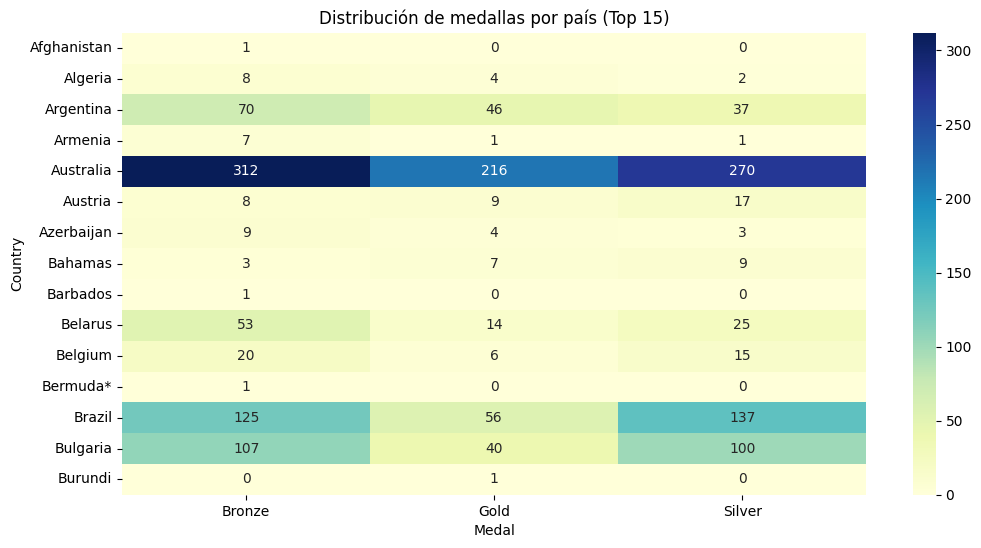

In [ ]:
# Tabla Entre "País" vs "Tipo de Medalla"
if "Medal" in df.columns:
    cross_tab = pd.crosstab(df['Country'], df['Medal'])
    print("\nTabla cruzada País vs Medalla:")
    print(cross_tab.head(10))

    # Heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(cross_tab.head(15), annot=True, fmt="d", cmap="YlGnBu")
    plt.title("Distribución de medallas por país (Top 15)")
    plt.show()

# Conclusiones iniciales a partir del análisis

# 1. Distribución de medallas por país
    Los países con mayor número de medallas suelen ser aquellos con más recursos deportivos,
    infraestructura y tradición en competencias internacionales. Esto refleja tanto la inversión
    en el deporte como la diversidad de disciplinas en las que participan.

# 2. Distribución de medallas por deporte
    Los deportes con más medallas suelen ser aquellos con más categorías o eventos (por ejemplo,
    atletismo o natación). Esto explica por qué dominan el ranking, ya que ofrecen más
    oportunidades de premiación que disciplinas con menos categorías.




In [ ]:
print("\nPaíses que más destacan en cada deporte:")
print(df.groupby("Sport")["Country"].value_counts().groupby(level=0).head(1))



Países que más destacan en cada deporte:
Sport              Country      
Aquatics           United States    578
Archery            Korea, South      52
Athletics          United States    299
Badminton          China             47
Baseball           Cuba             111
Basketball         United States    192
Boxing             Cuba              56
Canoe / Kayak      Germany           96
Cycling            Australia         54
Equestrian         United States     73
Fencing            France           115
Football           Brazil           109
Gymnastics         Romania          116
Handball           Korea, South      96
Hockey             Netherlands      159
Judo               Japan             57
Modern Pentathlon  Hungary           15
Rowing             Romania          156
Sailing            United States     64
Shooting           China             42
Softball           Australia         60
Table Tennis       China             61
Taekwondo          Korea, South      12
Tenni